In [564]:
# import Modules
"""
Data downloaded from "https://www.cdc.gov/cancer/uscs/dataviz/download_data.htm"
USCS-1999-2017

US population = 326,072,594
(as of 12/31/2017)
https://www.census.gov/popclock/

This Data has a total of 383,848,110.
I have to assume that the difference is of the mixed race, but the number is the population of all US residents.

"""

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns


In [565]:
# loading data source files from Google Drive
# loading file 1 "BYAREA1.txt"


data = pd.read_csv("cancer_1999-2017.csv", index_col = False)


In [566]:
data = data[data['YEAR'] == 2017]
data.head(50)

,Unnamed: 0,YEAR,SITE,RACE,SEX,COUNT,POPULATION
7719,7719,2017,Acute Lymphocytic,Asian/Pacific Islander,Female,24,10999800
7720,7720,2017,Acute Lymphocytic,Asian/Pacific Islander,Male,35,10130807
7721,7721,2017,Acute Lymphocytic,Black,Female,57,23807887
7722,7722,2017,Acute Lymphocytic,Black,Male,66,21980769
7723,7723,2017,Acute Lymphocytic,Hispanic,Female,150,29050132
7724,7724,2017,Acute Lymphocytic,Hispanic,Male,212,29650857
7725,7725,2017,Acute Lymphocytic,White,Female,585,127878578
7726,7726,2017,Acute Lymphocytic,White,Male,752,125664614
7727,7727,2017,Acute Myeloid,American Indian/Alaska Native,Female,24,2335226
7728,7728,2017,Acute Myeloid,American Indian/Alaska Native,Male,19,2349440


In [567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 7719 to 8175
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  457 non-null    int64 
 1   YEAR        457 non-null    int64 
 2   SITE        457 non-null    object
 3   RACE        457 non-null    object
 4   SEX         457 non-null    object
 5   COUNT       457 non-null    int64 
 6   POPULATION  457 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 28.6+ KB


In [568]:
data.dtypes

Unnamed: 0     int64
YEAR           int64
SITE          object
RACE          object
SEX           object
COUNT          int64
POPULATION     int64
dtype: object

In [569]:
# data.drop("Unnamed: 0", axis = 1), inplace = True
del data["Unnamed: 0"]
del data["YEAR"]         
#df = data.set_index('YEAR')


In [570]:
data.head()

,SITE,RACE,SEX,COUNT,POPULATION
7719,Acute Lymphocytic,Asian/Pacific Islander,Female,24,10999800
7720,Acute Lymphocytic,Asian/Pacific Islander,Male,35,10130807
7721,Acute Lymphocytic,Black,Female,57,23807887
7722,Acute Lymphocytic,Black,Male,66,21980769
7723,Acute Lymphocytic,Hispanic,Female,150,29050132


In [571]:
data.set_index('SITE')
df_race = data.groupby(['SITE', 'RACE']).sum(['COUNT', 'POPULATION']).reset_index()

In [572]:
df_race.head()

,SITE,RACE,COUNT,POPULATION
0,Acute Lymphocytic,Asian/Pacific Islander,59,21130607
1,Acute Lymphocytic,Black,123,45788656
2,Acute Lymphocytic,Hispanic,362,58700989
3,Acute Lymphocytic,White,1337,253543192
4,Acute Myeloid,American Indian/Alaska Native,43,4684666


In [573]:
df_race.set_index('RACE')
df_race2 = df_race.groupby(['SITE','RACE']).sum('COUNT').reset_index()

In [574]:
df_race2.head()

,SITE,RACE,COUNT,POPULATION
0,Acute Lymphocytic,Asian/Pacific Islander,59,21130607
1,Acute Lymphocytic,Black,123,45788656
2,Acute Lymphocytic,Hispanic,362,58700989
3,Acute Lymphocytic,White,1337,253543192
4,Acute Myeloid,American Indian/Alaska Native,43,4684666


In [575]:
# table with SITE, RACE and COUNT

df_race3 = df_race2[['SITE', 'RACE', 'COUNT']]

race = df_race3['RACE'].unique()

#df_race3.sort_values(by = ['RACE','COUNT'], ascending = False)

In [576]:
#for i in range(len(race)):
#    print(df_race3[df_race3['RACE']== race[i]].sort_values('COUNT', ascending = False).head(15))


top12_race = [[df_race3[df_race3['RACE']== race[i]].sort_values('COUNT', ascending = False).head(12)] for i in range(len(race))]

top12_race

[[                                 SITE                    RACE  COUNT
  98                  Lung and Bronchus  Asian/Pacific Islander   3926
  30                   Colon and Rectum  Asian/Pacific Islander   1824
  93   Liver and Intrahepatic Bile Duct  Asian/Pacific Islander   1668
  187                          Pancreas  Asian/Pacific Islander   1424
  35             Colon excluding Rectum  Asian/Pacific Islander   1394
  56                      Female Breast  Asian/Pacific Islander   1365
  119                     Miscellaneous  Asian/Pacific Islander   1121
  230                           Stomach  Asian/Pacific Islander    966
  87                          Leukemias  Asian/Pacific Islander    683
  103                         Lymphomas  Asian/Pacific Islander    674
  133              Non-Hodgkin Lymphoma  Asian/Pacific Islander    652
  200                          Prostate  Asian/Pacific Islander    620],
 [                                 SITE   RACE  COUNT
  99                 

In [577]:
# find Top 12 high in mortality

top12_cancer = df_race3.groupby('SITE').sum('COUNT').reset_index()

In [578]:
top12_cancer = top12_cancer.sort_values('COUNT', ascending = False).head(15)
top12_cancer.head(20)

,SITE,COUNT
24,Lung and Bronchus,151301
7,Colon and Rectum,56655
46,Pancreas,47079
29,Miscellaneous,45339
8,Colon excluding Rectum,45048
13,Female Breast,44983
50,Prostate,32497
23,Liver and Intrahepatic Bile Duct,30632
21,Leukemias,25288
25,Lymphomas,23169


In [579]:
exclude_list = ['Miscellaneous', 'Female Breast, <i>in situ</i>', 'Oral Cavity and Pharynx', 'Colon excluding Rectum', 'Non-Hodgkin Lymphoma']

#top15_cancer_list = top15_cancer.apply(lambda x: x if x.SITE not in exclude_list)
#top15_cancer_list = top15_cancer.apply(lambda x: x.SITE if x.SITE != 'Miscellaneous')

top12_cancer_list = top12_cancer['SITE']
top12_cancer_list = [i for i in top12_cancer_list if i not in exclude_list]

TOP 12 cancer list for all US and/or each ethnic groups are pretty much the same.
Therefore, I will be using the overall Top 15 cancer list to proceed with the analysis.

In [580]:
top12_cancer_list

['Lung and Bronchus',
 'Colon and Rectum',
 'Pancreas',
 'Female Breast',
 'Prostate',
 'Liver and Intrahepatic Bile Duct',
 'Leukemias',
 'Lymphomas',
 'Urinary Bladder',
 'Esophagus',
 'Ovary',
 'Kidney and Renal Pelvis']

In [581]:
# Top 15 cancer statistics by Cancer and Race in 2017
filter = df_race['SITE'].isin(top12_cancer_list)
df_2017 = df_race[filter]

df_2017 = df_2017[['RACE', 'SITE', 'COUNT', 'POPULATION']].sort_values(['RACE', 'SITE'])
df_2017['RATIO'] = df_2017['COUNT'] / df_2017['POPULATION'] * 1000



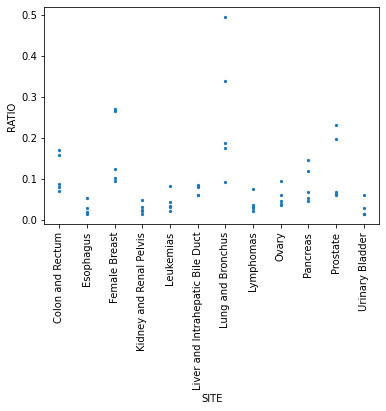

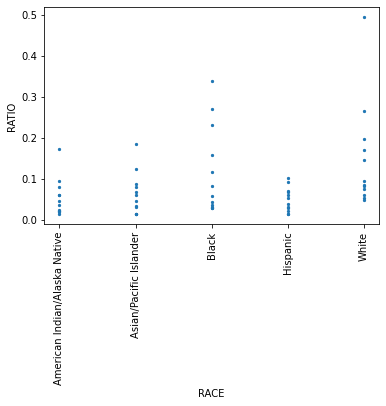

In [582]:
#plt.subplot(1, 2, 1)
ax1 = df_2017.plot.scatter(x = 'SITE', y = 'RATIO', marker = '.')
_ = plt.xticks(rotation='vertical')

#plt.subplot(1, 2, 2)
ax2 = df_2017.plot.scatter(x = 'RACE', y = 'RATIO', marker = '.')
_ = plt.xticks(rotation='vertical')



In [583]:
df_pivot = df_2017.pivot(index = 'RACE', columns = 'SITE', values = 'RATIO')
df_pivot

SITE,Colon and Rectum,Esophagus,Female Breast,Kidney and Renal Pelvis,Leukemias,Liver and Intrahepatic Bile Duct,Lung and Bronchus,Lymphomas,Ovary,Pancreas,Prostate,Urinary Bladder
RACE,,,,,,,,,,,,
American Indian/Alaska Native,0.079195,0.017717,0.094209,0.024121,0.022200,0.059769,0.173545,0.020919,0.036827,0.045041,0.061291,0.014089
Asian/Pacific Islander,0.086320,0.015049,0.124093,0.014813,0.032323,0.078938,0.185797,0.031897,0.045819,0.067390,0.061199,0.013771
Black,0.157441,0.027605,0.269953,0.030488,0.044159,0.082575,0.339342,0.036668,0.059014,0.117562,0.230429,0.027867
Hispanic,0.069982,0.012981,0.102685,0.021328,0.029999,0.060101,0.092877,0.028977,0.038107,0.052265,0.067823,0.013697
White,0.170160,0.053861,0.265783,0.047870,0.081714,0.084305,0.495269,0.075005,0.095387,0.145904,0.196213,0.059256


In [584]:
df = df_pivot.reset_index()
df = df.set_index('RACE')
df


SITE,Colon and Rectum,Esophagus,Female Breast,Kidney and Renal Pelvis,Leukemias,Liver and Intrahepatic Bile Duct,Lung and Bronchus,Lymphomas,Ovary,Pancreas,Prostate,Urinary Bladder
RACE,,,,,,,,,,,,
American Indian/Alaska Native,0.079195,0.017717,0.094209,0.024121,0.022200,0.059769,0.173545,0.020919,0.036827,0.045041,0.061291,0.014089
Asian/Pacific Islander,0.086320,0.015049,0.124093,0.014813,0.032323,0.078938,0.185797,0.031897,0.045819,0.067390,0.061199,0.013771
Black,0.157441,0.027605,0.269953,0.030488,0.044159,0.082575,0.339342,0.036668,0.059014,0.117562,0.230429,0.027867
Hispanic,0.069982,0.012981,0.102685,0.021328,0.029999,0.060101,0.092877,0.028977,0.038107,0.052265,0.067823,0.013697
White,0.170160,0.053861,0.265783,0.047870,0.081714,0.084305,0.495269,0.075005,0.095387,0.145904,0.196213,0.059256


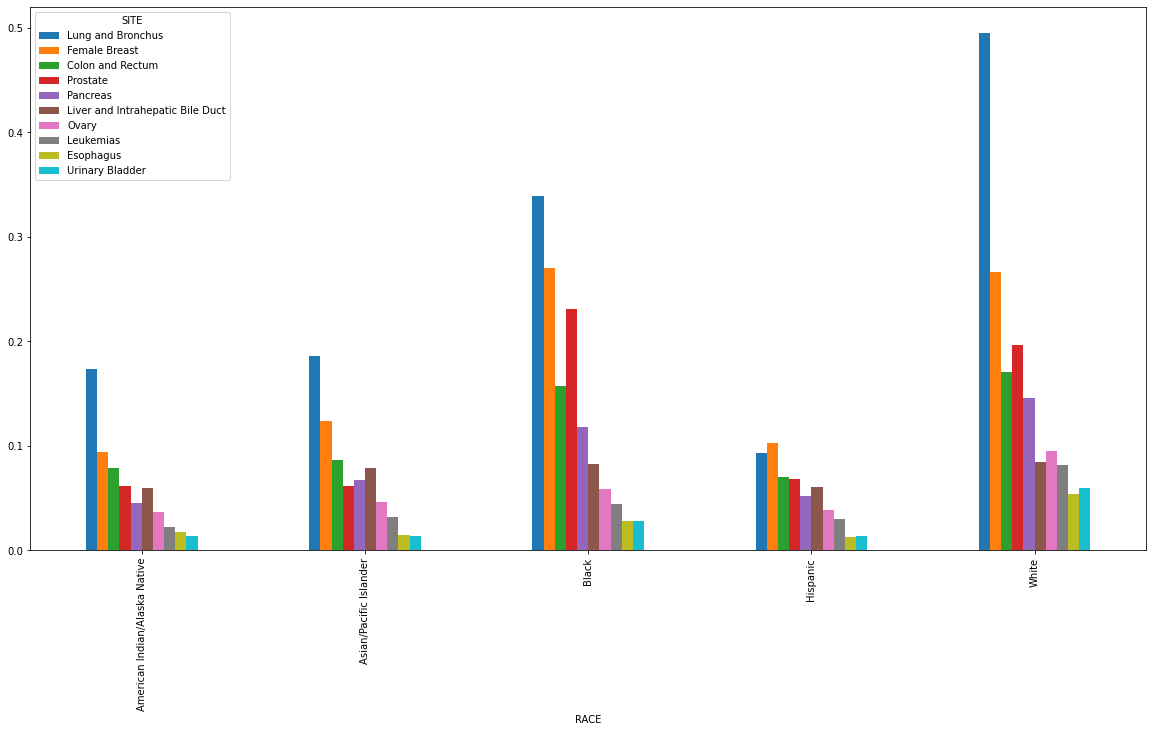

In [585]:
df[['Lung and Bronchus', 'Female Breast', 'Colon and Rectum','Prostate', 'Pancreas', 'Liver and Intrahepatic Bile Duct', 'Ovary', 'Leukemias', 'Esophagus', 'Urinary Bladder']].plot(kind='bar', figsize=(20,10))
plt.show()

In [586]:
df2 = df.T
df2 = df2.reset_index('SITE')

In [587]:
df2.rename(columns = {'SITE':'CancerType', 0:'American Indian/Alaska Native',1:'Asian/Pacific Islander',2:'Black',3:'Hispanic',4:'White'}, inplace = True)
df2 = df2.drop(0)
df2 = df2.set_index('CancerType')


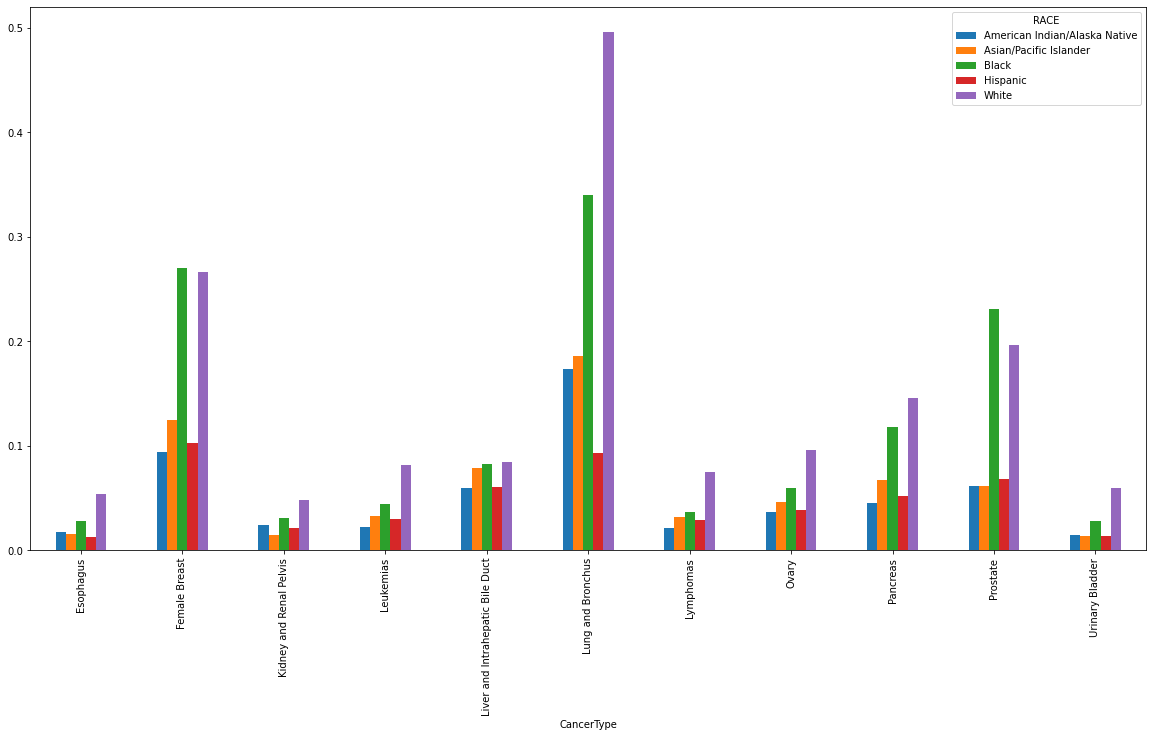

In [588]:
df2[['American Indian/Alaska Native', 'Asian/Pacific Islander', 'Black', 'Hispanic', 'White']].plot(kind = 'bar', figsize=(20,10))
#df[['Colon and Rectum','Pancreas']].plot(kind='bar')
#df2.plot(figsize=(20,10))
plt.show()